## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 500)
%matplotlib inline

In [2]:
# Plotting utilities

def plot_histogram(figsize_tuple, data, feature, filename):
    plt.figure(figsize=figsize_tuple)
    sns.distplot(data[feature].dropna())

    plt.title('Histogram of {}'.format(feature), fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig('../images/01c-eda-trails/{}.png'.format(filename), transparent=True)

## Read data

In [3]:
trails = pd.read_feather('../data/trails.feather')
df_twn_to_hkg = pd.read_csv('../data/admin_twn_to_hkg.csv', index_col=0)

In [4]:
flight_ids_twn_to_hkg = df_twn_to_hkg['flight_id'].unique().tolist()

## Rename columns

In [5]:
trails.rename(columns={
    'FlightId': 'flight_id',
    'Timestamp': 'timestamp_utc'
     }, inplace=True)

trails.columns = trails.columns.map(lambda x: x.lower())

## Summary statistics

In [6]:
trails.shape

(239418290, 7)

In [7]:
trails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239418290 entries, 0 to 239418289
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   flight_id      object 
 1   timestamp_utc  int64  
 2   latitude       float64
 3   longitude      float64
 4   altitude       int64  
 5   heading        int64  
 6   speed          int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.5+ GB


In [8]:
# trails.describe()

In [9]:
trails_twn_to_hkg = trails[trails['flight_id'].isin(flight_ids_twn_to_hkg)]

In [10]:
trails_twn_to_hkg.shape

(289713, 7)

In [11]:
trails_twn_to_hkg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289713 entries, 90519 to 239323749
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   flight_id      289713 non-null  object 
 1   timestamp_utc  289713 non-null  int64  
 2   latitude       289713 non-null  float64
 3   longitude      289713 non-null  float64
 4   altitude       289713 non-null  int64  
 5   heading        289713 non-null  int64  
 6   speed          289713 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 17.7+ MB


In [12]:
trails_twn_to_hkg.describe()

,timestamp_utc,latitude,longitude,altitude,heading,speed
count,2.897130e+05,289713.000000,289713.000000,289713.000000,289713.000000,289713.000000
mean,1.484632e+09,23.236468,117.027795,11523.787662,209.532465,226.320041
std,7.665282e+05,1.279084,3.151850,12728.112835,87.268680,138.828339
min,1.483194e+09,20.887848,113.689423,0.000000,0.000000,0.000000
25%,1.484050e+09,22.263885,113.929329,0.000000,160.000000,129.000000
50%,1.484704e+09,22.318371,115.351601,7025.000000,236.000000,251.000000
75%,1.485299e+09,25.061874,121.042900,17875.000000,267.000000,332.000000
max,1.485870e+09,28.258541,121.633163,43025.000000,359.000000,746.000000


## Duplicates

In [13]:
trails_twn_to_hkg[trails_twn_to_hkg.duplicated(subset=['flight_id', 'timestamp_utc'])]

,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed
119096371,c126012,1483506833,22.582352,117.917992,34000,237,461


In [14]:
trails_twn_to_hkg[(trails_twn_to_hkg['flight_id'] == 'c126012') &
                  (trails_twn_to_hkg['timestamp_utc'] == 1483506833)]

,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed
119096370,c126012,1483506833,22.684389,118.088074,34000,237,461
119096371,c126012,1483506833,22.582352,117.917992,34000,237,461


In [15]:
trails_twn_to_hkg.loc[119096370-1:119096370+1, :]

,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed
119096369,c126012,1483506723,22.684389,118.088074,34000,237,460
119096370,c126012,1483506833,22.684389,118.088074,34000,237,461
119096371,c126012,1483506833,22.582352,117.917992,34000,237,461


In [16]:
trails_twn_to_hkg = trails_twn_to_hkg.drop(119096370)

Dropped 119096370 as it shares the same latitude and longitude as 119096369

## Check for null values

In [17]:
trails_twn_to_hkg.isnull().sum()

flight_id        0
timestamp_utc    0
latitude         0
longitude        0
altitude         0
heading          0
speed            0
dtype: int64

**flight_id**

In [18]:
trails_twn_to_hkg['flight_id'].value_counts()

c440ee0    430
c36c3c0    418
c2e70ec    416
c501085    411
c3b232c    409
          ... 
c4490d9     35
c2c80c5     32
c4b220b     29
c4dfe1c     16
c3842f8     15
Name: flight_id, Length: 1150, dtype: int64

There are some flight trails with only a few records of their flight path.

**timestamp**

In [19]:
# def get_utc_datetime(value):
#     try:
#         return datetime.fromtimestamp(value)
#     except:
#         return pd.NaT
    
# trails_twn_to_hkg['timestamp_dt'] = trails_twn_to_hkg['timestamp_dt'].map(get_utc_datetime)

In [20]:
trails_twn_to_hkg['timestamp_dt'] = pd.to_datetime(trails_twn_to_hkg['timestamp_utc'], unit='s')

In [21]:
trails_twn_to_hkg['timestamp_dt'].min()

Timestamp('2016-12-31 14:18:43')

In [22]:
trails_twn_to_hkg['timestamp_dt'].max()

Timestamp('2017-01-31 13:46:24')

**latitude**

In [23]:
trails_twn_to_hkg['latitude'].min()

20.887848

In [24]:
trails_twn_to_hkg['latitude'].max()

28.258540999999997

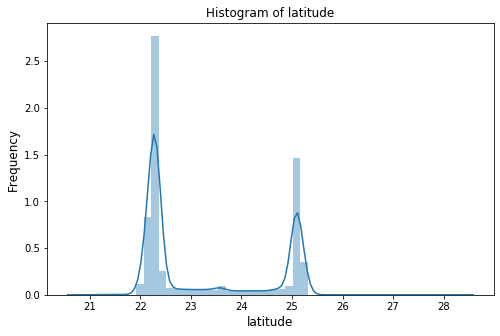

In [25]:
plot_histogram((8,5), trails_twn_to_hkg, 'latitude', '01-histogram-latitude')

**longitude**

In [26]:
trails_twn_to_hkg['longitude'].min()

113.689423

In [27]:
trails_twn_to_hkg['longitude'].max()

121.63316299999998

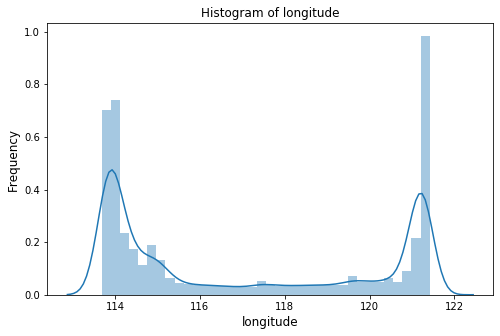

In [28]:
plot_histogram((8,5), trails_twn_to_hkg, 'longitude', '02-histogram-longitude')

**altitude**

In [29]:
trails_twn_to_hkg['altitude'].min()

0

In [30]:
trails_twn_to_hkg['altitude'].max()

43025

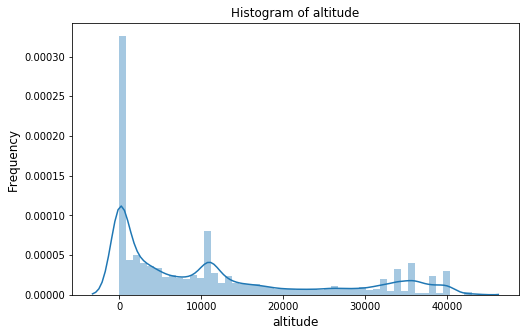

In [31]:
plot_histogram((8,5), trails_twn_to_hkg, 'altitude', '03-histogram-altitude')

Observation: Aircrafts seem to be on the ground for a large proportion of time

**heading**

In [32]:
trails_twn_to_hkg['heading'].min()

0

In [33]:
trails_twn_to_hkg['heading'].max()

359

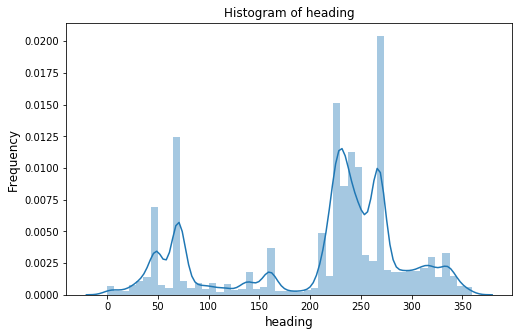

In [34]:
plot_histogram((8,5), trails_twn_to_hkg, 'heading', '04-histogram-heading')

Observation: heading seems to be uniformly distributed.

**speed**

In [35]:
trails_twn_to_hkg['speed'].min()

0

In [36]:
trails_twn_to_hkg['speed'].max()

746

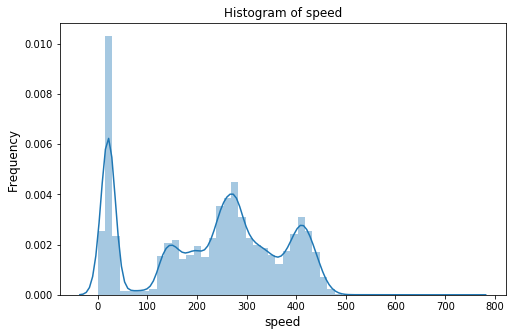

In [37]:
plot_histogram((8,5), trails_twn_to_hkg, 'speed', '05-histogram-speed')

Observation: 
- Multiple peaks (modes) around 0, ~200-300, ~400. 
- Not normally distributed. 
- Ranges between 0 and 746 kph

In [38]:
trails_twn_to_hkg.reset_index(drop=True, inplace=True)
trails_twn_to_hkg.to_feather('../data/trails-twn-to-hkg.feather')

## Analysis of a single flight (flight_id = c4fa940)

In [39]:
trails_twn_to_hkg.loc[trails_twn_to_hkg['flight_id'] == 'c4fa940', :].shape

(271, 8)

In [40]:
trails_twn_to_hkg.loc[trails_twn_to_hkg['flight_id'] == 'c4fa940', :]

,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed,timestamp_dt
139,c4fa940,1485756385,25.079578,121.238159,0,317,2,2017-01-30 06:06:25
140,c4fa940,1485756444,25.079378,121.238419,0,320,2,2017-01-30 06:07:24
141,c4fa940,1485756910,25.072977,121.232498,0,230,28,2017-01-30 06:15:10
142,c4fa940,1485756920,25.072620,121.232056,0,227,25,2017-01-30 06:15:20
143,c4fa940,1485756936,25.071976,121.231880,0,149,31,2017-01-30 06:15:36
144,c4fa940,1485756947,25.071499,121.232368,0,137,30,2017-01-30 06:15:47
145,c4fa940,1485756962,25.070927,121.232819,0,163,24,2017-01-30 06:16:02
146,c4fa940,1485756973,25.070498,121.232613,0,225,24,2017-01-30 06:16:13
147,c4fa940,1485756983,25.070194,121.232170,0,227,26,2017-01-30 06:16:23
148,c4fa940,1485756989,25.069998,121.231926,0,227,29,2017-01-30 06:16:29


In [41]:
aggregations = {
    'latitude': [min, max],
    'longitude': [min, max],
    'altitude': [min, max],
    'heading': [min, max],
    'speed': [min, max],
    'timestamp_dt': [min, max]
}

trails_twn_to_hkg.loc[trails_twn_to_hkg['flight_id'] == 'c4fa940'].groupby('flight_id').agg(aggregations)

latitude             longitude             altitude         \
                 min       max         min         max      min    max   
flight_id                                                                
c4fa940    22.107513  25.27158  113.717682  121.310204        0  40000   

          heading      speed             timestamp_dt                      
              min  max   min  max                 min                 max  
flight_id                                                                  
c4fa940        11  347     2  432 2017-01-30 06:06:25 2017-01-30 07:53:38

In [42]:
# inclusive of on-ground activity
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940'), 'timestamp_utc'].max() -\
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940'), 'timestamp_utc'].min()

6433

In [43]:
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940') & (trails_twn_to_hkg['altitude'] > 0), 'timestamp_utc'].max() -\
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940') & (trails_twn_to_hkg['altitude'] > 0), 'timestamp_utc'].min()

5267

In [44]:
min_time_in_air_index = trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940') & (trails_twn_to_hkg['altitude'] > 0), 'timestamp_utc'].idxmin()
print(min_time_in_air_index)
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940'), :].loc[min_time_in_air_index-1:min_time_in_air_index]

169


,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed,timestamp_dt
168,c4fa940,1485757297,25.068939,121.233765,0,48,135,2017-01-30 06:21:37
169,c4fa940,1485757323,25.078388,121.245529,1200,48,131,2017-01-30 06:22:03


In [45]:
max_time_in_air_index = trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940') & (trails_twn_to_hkg['altitude'] > 0), 'timestamp_utc'].idxmax()
print(max_time_in_air_index)
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940'), :].loc[max_time_in_air_index:max_time_in_air_index + 1]

382


,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed,timestamp_dt
382,c4fa940,1485762590,22.309937,113.894814,25,70,133,2017-01-30 07:49:50
383,c4fa940,1485762596,22.311090,113.898468,0,71,135,2017-01-30 07:49:56


In [46]:
print(trails_twn_to_hkg.loc[383, 'timestamp_utc'] - trails_twn_to_hkg.loc[168, 'timestamp_utc'])
trails_twn_to_hkg.loc[max_time_in_air_index, 'timestamp_utc'] -\
trails_twn_to_hkg.loc[min_time_in_air_index, 'timestamp_utc']

5299


5267

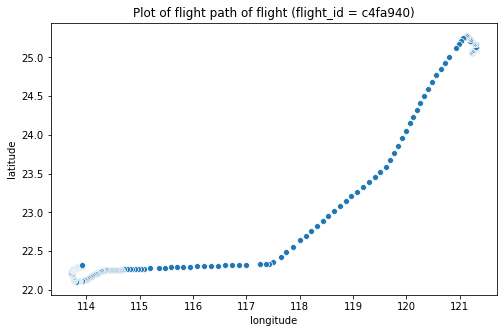

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Plot of flight path of flight (flight_id = c4fa940)')
sns.scatterplot(ax = ax, x='longitude', y='latitude', data=trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940')])
plt.show()
fig.savefig('../images/01c-eda-trails/{}.png'.format('06-scatterplot-flight_c4fa940'), transparent=True)

In [48]:
trails_twn_to_hkg.loc[(trails_twn_to_hkg['flight_id'] == 'c4fa940'), 'heading']

139    317
140    320
141    230
142    227
143    149
144    137
145    163
146    225
147    227
148    227
149    230
150    230
151    230
152    230
153    227
154    230
155    230
156    227
157    227
158    227
159    196
160    163
161    135
162    140
163    132
164     87
165     53
166     50
167     50
168     48
169     48
170     49
171     49
172     49
173     50
174     51
175     49
176     48
177     24
178     11
179    311
180    294
181    284
182    284
183    288
184    297
185    304
186    310
187    313
188    315
189    318
190    319
191    310
192    290
193    277
194    270
195    239
196    227
197    227
198    228
199    224
200    224
201    224
202    224
203    224
204    224
205    213
206    214
207    214
208    215
209    215
210    215
211    215
212    215
213    215
214    215
215    215
216    215
217    228
218    237
219    237
220    237
221    237
222    237
223    237
224    237
225    237
226    237
227    237
228    237
229    237